In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [79]:
data = pd.read_csv('dataset.csv')

In [80]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Смотрим данные

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Значения столбцов:  
Unnamed: 0 - индексацияч, которую нужно удалить  
track_id - id трека, не влияет ни на что  
artists - исполнители  песни  
album_name - название альбома  
track_name - название трека  
popularity - таргет. Популярность трека выраженная в числе от 0 до 100  
duration_ms - длитьельность трека в миллисекундах
explicit - есть ли в треке нецензурная брань и откровенные сцены, bool  
danceability - танцевальность трека - число от 0 до 1  
energy - энергичность трека  - число от 0 до 1 
key - тональность  
loudness - громкость  в дб
mode - режим аудиозаписи  
speechiness - доля вокала  - число от 0 до 1 
acousticness - звучание трека - число от 0 до 1  
instrumentalness - инструментальность трека  - число от 0 до 1 
liveness - живость трека - число от 0 до 1 
valence - привлекательность трека - число от 0 до 1   
tempo - темп  трека  
time_signature - такт  
track_genre - жанр

In [82]:
data['popularity'].value_counts() # количество вхождений каждого элеманта popularity

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [83]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [84]:
data.isnull().sum() # пустые значения

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [85]:
data = data.dropna() # удаляем пустые значения

In [86]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [87]:
data.shape

(113999, 21)

In [88]:
data=data.drop(['Unnamed: 0', 'track_id' ], axis=1) # Убираем незначащие колонки с индексами и id

In [89]:
data['duration_m'] = data['duration_ms'] / 1000 / 60 # переводим ms в минуты и удаляем старый столбец
data = data.drop(['duration_ms'], axis=1)

# Посмотрим графики зависимостей

In [90]:
orig_df = pd.read_csv('dataset.csv')

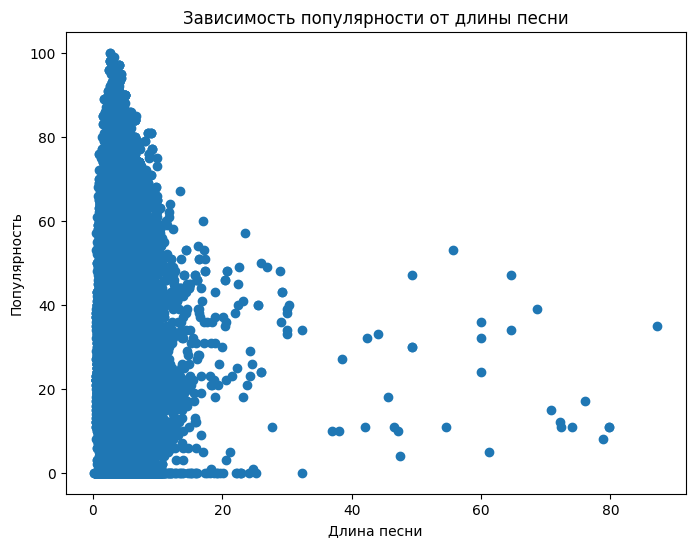

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data['duration_m'], data['popularity'], label='Популярность', marker='o', linestyle='')
plt.xlabel('Длина песни')
plt.ylabel('Популярность')
plt.title('Зависимость популярности от длины песни')
plt.show()

Самые популярные песни имеют длину до 5 минут

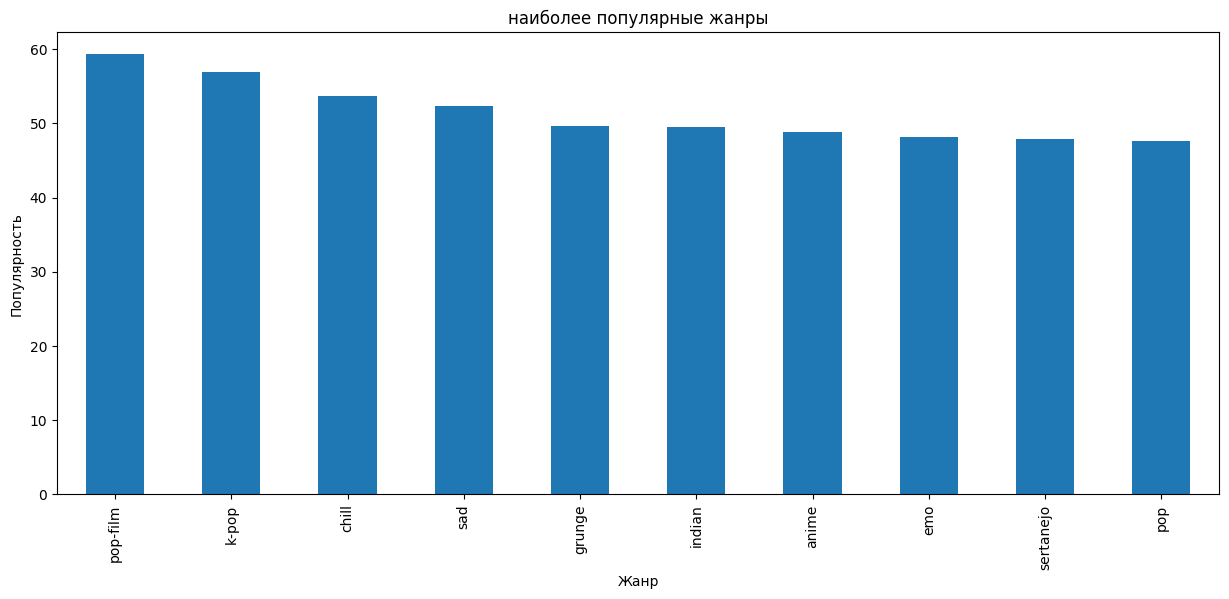

In [92]:
plt.figure(figsize=(15,6))
generes_df = orig_df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).head(10)
generes_df.plot(kind='bar')
plt.title('наиболее популярные жанры')
plt.xlabel("Жанр")
plt.ylabel("Популярность")
plt.show()

Наиболее популярные жанры - это поп-культура либо музыка подл настроение(sad, chill)

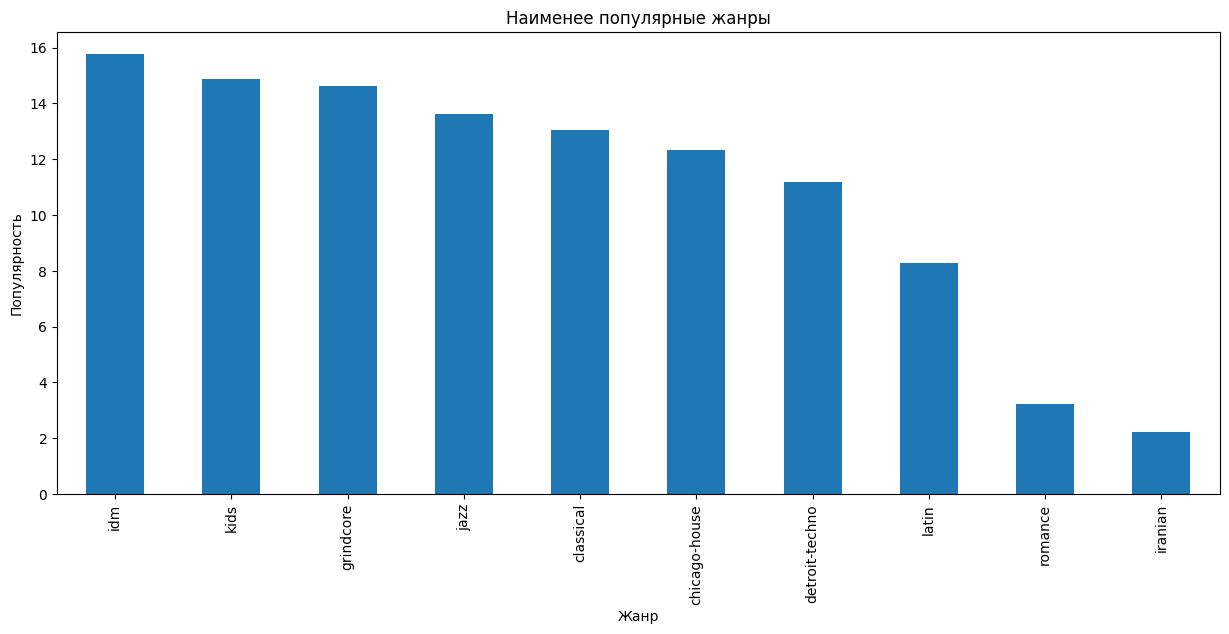

In [93]:
plt.figure(figsize=(15,6))
generes_df = orig_df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).tail(10)
generes_df.plot(kind='bar')
plt.title('Наименее популярные жанры')
plt.xlabel("Жанр")
plt.ylabel("Популярность")
plt.show()

Наименее популярные жанры - редкие, с небольшим сообществом либо национальные

Text(0.5, 1.0, 'Зависимость популярности от explicit-контента')

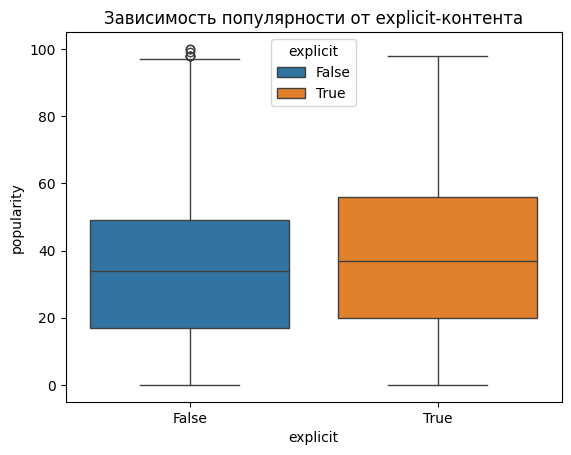

In [94]:
sns.boxplot(x='explicit', y='popularity', data=data, hue='explicit')
plt.title('Зависимость популярности от explicit-контента')


explicit-контент почти не влияет на популярность, но треки с explicit чуть популярнее в среднем

Text(0.5, 1.0, 'Зависимость популярности от громкости')

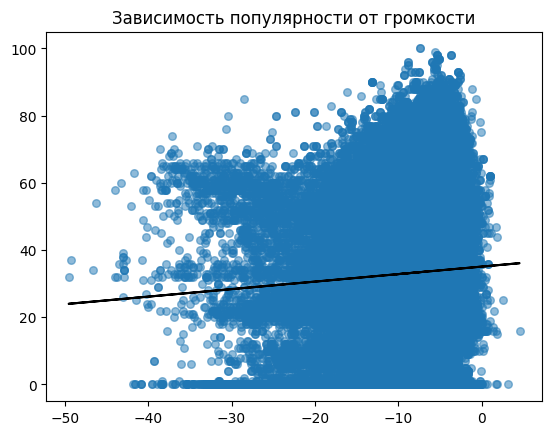

In [95]:
plt.scatter(data["loudness"], data['popularity'], s=30, alpha=0.5)
plt.plot(data["loudness"], np.poly1d(np.polyfit(data["loudness"], data['popularity'], 1))(data["loudness"]), color='black')

plt.title("Зависимость популярности от громкости")

Четко видно корреляцию между громкостью и популярностью: тихие треки менее популярны.  Самые популярные находятся на громкости от -10 до -5

In [96]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [97]:
categorical_features

['artists', 'album_name', 'track_name', 'track_genre']

In [98]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [99]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [100]:
data.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_m          0
dtype: int64

In [101]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо
y = data['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
import tensorflow as tf
from tensorflow import keras

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10


C:\Users\SystemX\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 623.2977 - val_loss: 478.5520
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 475.0334 - val_loss: 471.5156
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 461.9748 - val_loss: 457.6719
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 453.6646 - val_loss: 449.3764
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 443.2350 - val_loss: 443.5643
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 430.3174 - val_loss: 438.5015
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 427.7818 - val_loss: 435.8446
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 422.1563 - val_loss: 430.6658
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 416.6552 - val_loss: 429.8456
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 414.5734 - val_loss: 425.2397
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 425.8879
Test Loss: 419.9212341308594


In [104]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
MAE: 16.55308723449707
RMSE: 20.49197826213231


MSE = квадрат
MAE = модуль
RMSE = MSE с корнем

R2

MAPE. 

In [105]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

1.897700375973069e+16

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
713/713 ━━━

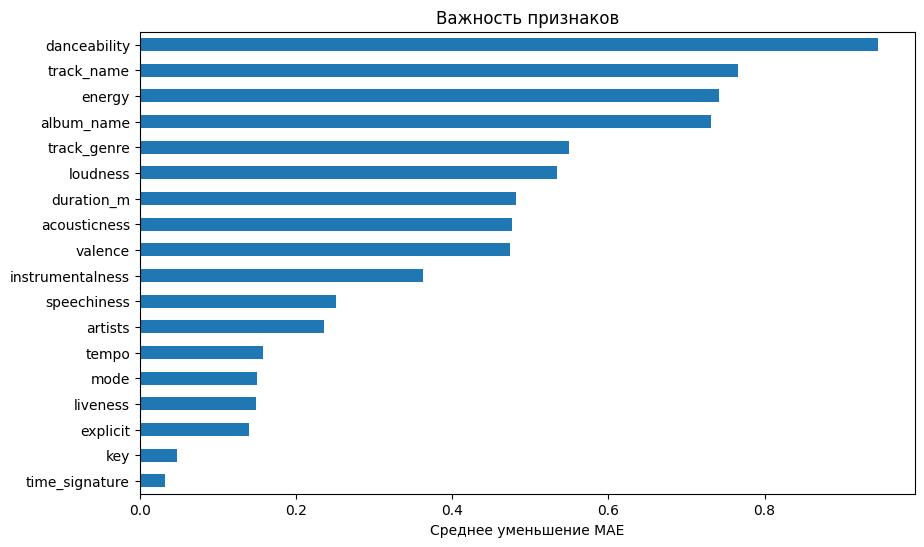

In [106]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()